In [1]:
import pandas as pd

df = pd.read_csv('StudentPerformanceFactors.csv')

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Calculate score distribution per categories

def score_category_describe (category):
    data = df.groupby(category)['Exam_Score'].describe().sort_values(by='mean', ascending=False)
    print(data['mean'], data['std'])
    print("\n")

score_category_describe('Gender')
score_category_describe('Motivation_Level')
score_category_describe('Family_Income')

Gender
Female    67.244898
Male      67.228894
Name: mean, dtype: float64 Gender
Female    4.054451
Male      3.766360
Name: std, dtype: float64


Motivation_Level
High      67.704321
Medium    67.330648
Low       66.752194
Name: mean, dtype: float64 Motivation_Level
High      3.876966
Medium    3.827303
Low       3.958139
Name: std, dtype: float64


Family_Income
High      67.842396
Medium    67.334959
Low       66.848428
Name: mean, dtype: float64 Family_Income
High      4.155161
Medium    3.806476
Low       3.800807
Name: std, dtype: float64




In [8]:
# Correlation between causes and results

CAUSE = 'School_Type'

df.groupby(CAUSE)['Exam_Score'].agg(['count', 'mean', 'median'])

,count,mean,median
School_Type,,,
Private,2009,67.287705,67.0
Public,4598,67.212919,67.0


<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

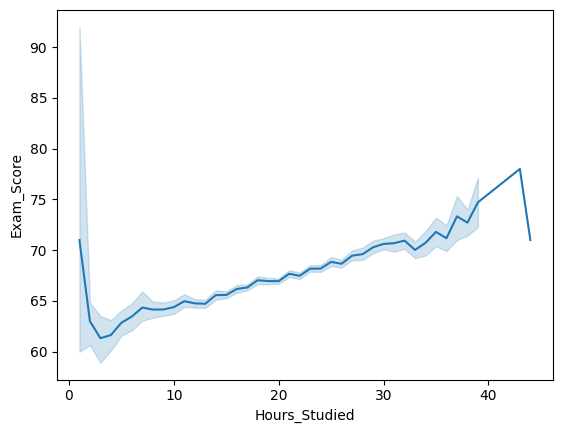

In [23]:
# Plotting graphs

import seaborn as sns

hours = df

sns.lineplot(x="Hours_Studied", y="Exam_Score", data=hours)

<Axes: xlabel='Gender', ylabel='Exam_Score'>

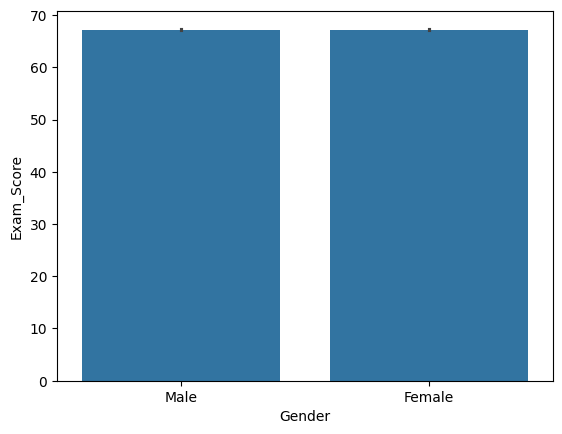

In [26]:
sns.barplot(x="Gender", y="Exam_Score", data=hours)


<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

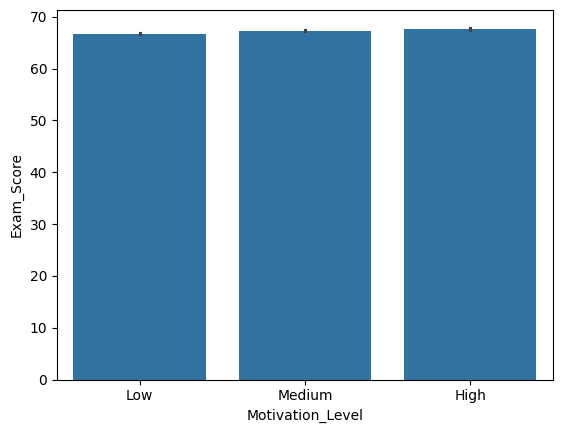

In [28]:
sns.barplot(x="Motivation_Level", y="Exam_Score", data=hours)

<Axes: xlabel='Learning_Disabilities', ylabel='Exam_Score'>

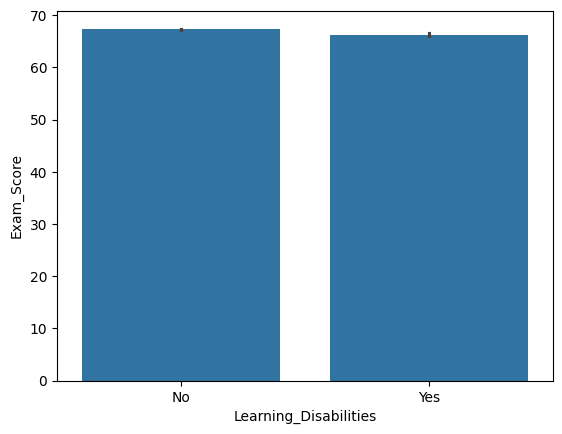

In [30]:
sns.barplot(x="Learning_Disabilities", y="Exam_Score", data=hours)

In [ ]:
# Filter conditions

smart = df[df["Exam_Score"] > 90]
smart_poor = df[(df["Access_to_Resources"] == "Low") & (df["Exam_Score"] > 90)]

smart_poor

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6347,28,96,High,Low,Yes,4,98,High,Yes,1,High,High,Public,Positive,3,No,High School,Near,Male,98


In [ ]:
def grade_func (value):
    if value < 60:
        return "dumb"
    elif value < 80:
        return "ok"
    else:
        return "genius"

tag = df["Exam_Score"].apply(grade_func)
df["Score_Tag"] = tag

df.groupby("Score_Tag").describe()

Hours_Studied                                                      \
                  count       mean       std  min    25%   50%    75%   max   
Score_Tag                                                                     
dumb               68.0  10.308824  4.694415  2.0   6.75  11.0  14.00  21.0   
genius             48.0  19.500000  6.562304  1.0  16.00  20.5  24.25  31.0   
ok               6491.0  20.080111  5.915876  1.0  16.00  20.0  24.00  44.0   

          Attendance             ... Physical_Activity      Exam_Score  \
               count       mean  ...               75%  max      count   
Score_Tag                        ...                                     
dumb            68.0  63.852941  ...               3.0  5.0       68.0   
genius          48.0  79.041667  ...               3.0  5.0       48.0   
ok            6491.0  80.153289  ...               4.0  6.0     6491.0   

                                                               
                mean       std   min   25%   50%   75%    max  
Score_Tag                                                      
dumb       58.455882  0.799885  55.0  58.0  59.0  59.0   59.0  
genius     89.666667  6.405893  80.0  84.0  89.0  95.0  101.0  
ok         67.161762  3.250842  60.0  65.0  67.0  69.0   79.0  

[3 rows x 56 columns]